# Fibonacci numbers
In this tutorial we will discuss how to perform the Fibonacci numbers using *Python*. There is a lot of tutorials on the Internet describing various way to calculate an N-th element of this sequence. We will add extra aspects to these considerations.
### What is the Fibonacci sequence?
At the beginning let's just write what are the Fibonacci numbers: `F(N)`. The two first elements are defined as 0 and 1, i.e. `F(0) = 0`, `F(1) = 1`. The next one is sum of the two previous elements: `F(N) = F(N-2) + F(N-1)`, so the first fifteen elements are equal: `0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377`. Let's see them on the plot:

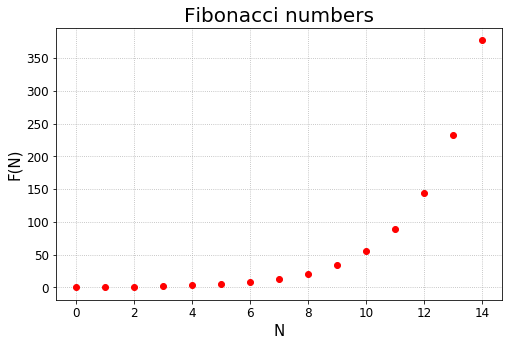

In [1]:
import matplotlib.pyplot as plt

X = range(15)
Y = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
plt.figure(figsize=(8,5))
plt.plot(X, Y, 'ro')
plt.title('Fibonacci numbers', fontsize=20)
plt.xlabel('N', fontsize=15)
plt.ylabel('F(N)', fontsize=15)
plt.tick_params(labelsize=12)
plt.grid(linestyle='dotted')
plt.show()

OK, now let's define three different functions allowing to compute the N-th element of the sequence:

In [2]:
def fibonacci_recursive(n):
    if n == 0:
        return n
    elif n == 1:
        return n
    else:
        return fibonacci_recursive(n-2) + fibonacci_recursive(n-1)


def fibonacci_iterative(n):
    if not n:
        return n
    
    first, second = 0, 1

    for i in range(n-1):
        first, second = second, first + second
            
    return second


fibonacci_memo_dict = {0:0, 1:1}
def fibonacci_memorization(n):
    global fibonacci_memo_dict
    
    if not n in fibonacci_memo_dict:
        fibonacci_memo_dict[n] = fibonacci_memorization(n-2) + fibonacci_memorization(n-1)
        
    return fibonacci_memo_dict[n]

We have to be sure that the functions are defined correctly. Let's check them for a few arguments:

In [3]:
N = 15
header = " N: recursive iterative memorization"

print("{}\n{}".format(header, "-"*len(header)))
for i in range(N):
    out = "{0:2d}: {1:5d} {2:9d} {3:10d}".format(i, fibonacci_recursive(i), fibonacci_iterative(i), fibonacci_memorization(i))
    print(out)

 N: recursive iterative memorization
------------------------------------
 0:     0         0          0
 1:     1         1          1
 2:     1         1          1
 3:     2         2          2
 4:     3         3          3
 5:     5         5          5
 6:     8         8          8
 7:    13        13         13
 8:    21        21         21
 9:    34        34         34
10:    55        55         55
11:    89        89         89
12:   144       144        144
13:   233       233        233
14:   377       377        377


### How fast are the functions?
Let's check which function executes the most rapidly. To do this we use the magic command `%%timeit`:

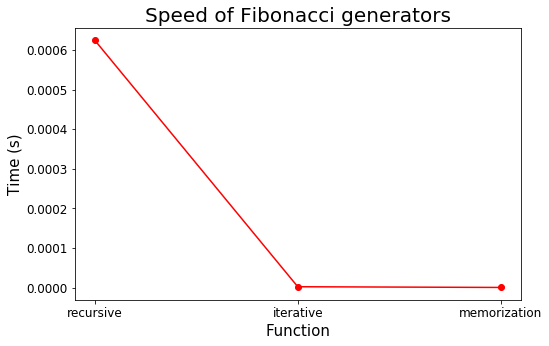

In [4]:
fib_rec_time = %%timeit -q -o fibonacci_recursive(N)
fib_ite_time = %%timeit -q -o fibonacci_iterative(N)
fib_mem_time = %%timeit -q -o fibonacci_memorization(N)
fib_time = (fib_rec_time, fib_ite_time, fib_mem_time)

X = [i+1 for i in range(len(fib_time))]
Y = [ft.average for ft in fib_time]
plt.figure(figsize=(8,5))
plt.plot(X, Y, 'ro-')
plt.title('Speed of Fibonacci generators', fontsize=20)
plt.xlabel('Function', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.tick_params(labelsize=12)
x_ticks = ['recursive', 'iterative', 'memorization']
plt.xticks(X, x_ticks)
plt.show()

We see that the recursive version is very slow compared to other generators. The reason is simple. The return command in the recursive case: `return fibonacci_recursive(n-2) + fibonacci_recursive(n-1)` calls twice `fibonacci_recursive(n-2)`. The first time for the left part of return statement and then `fibonacci_recursive(n-1)` calls it again. This is redundant. Moreover, the *tree* of calls spreads out very quickly exploiting CPU resources.